In [1]:
!gpustat

blade                Tue Jul 13 10:03:02 2021  455.45.01
[0] RTX A6000        | 33'C,   0 % |     1 / 48685 MB |
[1] RTX A6000        | 79'C,  68 % | 44888 / 48685 MB | wangh19(44885M)
[2] RTX A6000        | 32'C,   0 % |     1 / 48685 MB |
[3] RTX A6000        | 76'C,  67 % | 44108 / 48685 MB | wangh19(44105M)
[4] RTX A6000        | 26'C,   0 % |     1 / 48685 MB |
[5] RTX A6000        | 53'C,  80 % | 44532 / 48685 MB | gkissas(44529M)
[6] RTX A6000        | 27'C,   0 % |     1 / 48685 MB |
[7] RTX A6000        | 25'C,   0 % |     1 / 48685 MB |


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
!ls

32_fit.pdf   max_freq_256_0.0001.npy  toy_loss_256_0.001.npy
32_loss.pdf  max_freq_256_0.001.npy   toy_loss_256_0.01.npy
32_norm.pdf  max_freq_256_0.01.npy    toy_loss_256_1e-05.npy
8_fit.pdf    max_freq_256_1e-05.npy   toy_loss_256.npy
8_loss.pdf   max_freq_256.npy	      toy_plot.ipynb
8_norm.pdf   test_l2_256.pdf	      training_l2_256.pdf
Archive      toy_loss_256_0.0001.npy


In [4]:
from jax import numpy as np
from matplotlib import pyplot as plt

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16,
                        'lines.linewidth': 2,
                        'axes.labelsize': 10,
                        'axes.titlesize': 16,
                        'xtick.labelsize': 10,
                        'ytick.labelsize': 10,
                        'legend.fontsize': 10,
                        'axes.linewidth': 2})

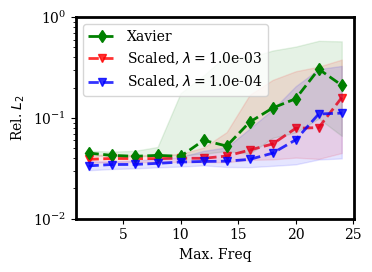

In [6]:
loss_stor = np.load('toy_loss_256_0.01.npy')
max_freqs = np.load('max_freq_256_0.01.npy')
idx = 12
normal_loss = loss_stor[:idx,:,:,:16]
scaled_loss = loss_stor[:idx,:,:,16:]

normal_loss = normal_loss.reshape(normal_loss.shape[:2] + (-1,))
scaled_loss = scaled_loss.reshape(scaled_loss.shape[:2] + (-1,))
num_data = 256

plt.figure(figsize = (4,3))
plt.fill_between(max_freqs[:idx] / 2, *np.quantile(scaled_loss[:,0], np.array([0.1, 0.9]), 1), alpha = 0.1, color = 'g')
plt.plot(max_freqs[:idx] / 2, np.median(normal_loss[:,0], 1), linestyle = '--', marker = 'd', label = 'Xavier', color = 'g')

for lam, c, zorder in zip([0.001, 0.0001], ['r', 'b'], [1,2]):
    loss_stor = np.load(f'toy_loss_256_{lam}.npy')
    max_freqs = np.load(f'max_freq_256_{lam}.npy')

    scaled_loss = loss_stor[:idx,:,:,16:]

    normal_loss = normal_loss.reshape(normal_loss.shape[:2] + (-1,))
    scaled_loss = scaled_loss.reshape(scaled_loss.shape[:2] + (-1,))
    num_data = 256

    
    plt.plot(max_freqs[:idx] / 2, np.median(scaled_loss[:,0], 1), linestyle = '--', marker = 'v', color = c, \
             label = r'Scaled, $\lambda = $' + f'{lam:.1e}', zorder = zorder, alpha = 0.8)

    plt.fill_between(max_freqs[:idx] / 2, *np.quantile(scaled_loss[:,0], np.array([0.1, 0.9]), 1), alpha = 0.1, color = c,\
                    zorder = zorder)
    
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.xlabel('Max. Freq')
plt.ylabel(r'Rel. $L_2$')
plt.ylim([0.01, 1])
plt.tight_layout()


plt.savefig(f'training_l2_{num_data}.pdf', dpi = 200)
plt.show()
plt.close()

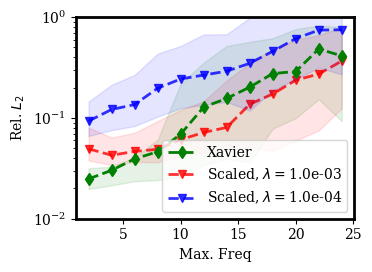

In [7]:
loss_stor = np.load('toy_loss_256_0.01.npy')
max_freqs = np.load('max_freq_256_0.01.npy')
normal_loss = loss_stor[:idx,:,:,:16]
scaled_loss = loss_stor[:idx,:,:,16:]

normal_loss = normal_loss.reshape(normal_loss.shape[:2] + (-1,))
scaled_loss = scaled_loss.reshape(scaled_loss.shape[:2] + (-1,))
num_data = 256

plt.figure(figsize = (4,3))

plt.fill_between(max_freqs[:idx] / 2, *np.quantile(scaled_loss[:,1], np.array([0.1, 0.9]), 1), alpha = 0.1, color = 'g')
plt.plot(max_freqs[:idx] / 2, np.median(normal_loss[:,1], 1), linestyle = '--', marker = 'd', label = 'Xavier', color = 'g')

for lam, c, zorder in zip([0.001, 0.0001], ['r', 'b'], [1,2]):
    loss_stor = np.load(f'toy_loss_256_{lam}.npy')
    max_freqs = np.load(f'max_freq_256_{lam}.npy')

    scaled_loss = loss_stor[:idx,:,:,16:]

    normal_loss = normal_loss.reshape(normal_loss.shape[:2] + (-1,))
    scaled_loss = scaled_loss.reshape(scaled_loss.shape[:2] + (-1,))
    num_data = 256

    
    plt.plot(max_freqs[:idx] / 2, np.median(scaled_loss[:,1], 1), linestyle = '--', marker = 'v', color = c, \
             label = r'Scaled, $\lambda = $' + f'{lam:.1e}', zorder = zorder, alpha = 0.8)

    plt.fill_between(max_freqs[:idx] / 2, *np.quantile(scaled_loss[:,1], np.array([0.1, 0.9]), 1), alpha = 0.1, color = c,\
                    zorder = zorder)
    
plt.yscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Max. Freq')
plt.ylabel(r'Rel. $L_2$')
plt.ylim([0.01, 1])
plt.tight_layout()


plt.savefig(f'test_l2_{num_data}.pdf', dpi = 200)
plt.show()
plt.close()